# Import libs

In [17]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Artificial I dataset

In [18]:
Xy = pd.read_csv('./datasets/artificial_I.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Instantiating models

In [19]:
knn_model = knn(k=3, type_distance_calc='euclidean')
dmc_model = dmc(type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [39]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)
    dmc_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)

# Showing knn informations computed

In [42]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[1.0, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 0.75, 0.875, 1.0, 0.75, 1.0, 0.875, 0.75, 1.0, 1.0, 1.0, 0.875, 1.0, 0.75]

Accuracy:
0.925

Standard Deviation:
0.1

Confusion Matrix:
   1  0
1  1  0
0  0  7
   0  1
0  5  0
1  0  3
   0  1
0  5  0
1  1  2
   0  1
0  7  0
1  0  1
   0  1
0  7  0
1  0  1
   0  1
0  6  0
1  0  2
   1  0
1  2  0
0  0  6
   1  0
1  1  2
0  0  5
   1  0
1  1  1
0  0  6
   0  1
0  7  0
1  0  1
   1  0
1  2  2
0  0  4
   0  1
0  7  0
1  0  1
   0  1
0  7  0
1  1  0
   1  0
1  2  2
0  0  4
   0  1
0  5  0
1  0  3
   0  1
0  6  0
1  0  2
   0  1
0  7  0
1  0  1
   1  0
1  1  1
0  0  6
   0  1
0  6  0
1  0  2
   1  0
1  2  2
0  0  4


In [43]:
confusion_matrix_mean(knn_confusion_matrix_list)

,1,0
1,1,0
0,0,5


In [51]:
knn_confusion_matrix_list[7]

,1,0
1,1,2
0,0,5


# Showing dmc informations computed

In [40]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
   1  0
1  1  0
0  0  7
   0  1
0  5  0
1  0  3
   0  1
0  5  0
1  0  3
   0  1
0  7  0
1  0  1
   0  1
0  7  0
1  0  1
   0  1
0  6  0
1  0  2
   1  0
1  2  0
0  0  6
   1  0
1  3  0
0  0  5
   1  0
1  2  0
0  0  6
   0  1
0  7  0
1  0  1
   1  0
1  4  0
0  0  4
   0  1
0  7  0
1  0  1
   0  1
0  7  0
1  0  1
   1  0
1  4  0
0  0  4
   0  1
0  5  0
1  0  3
   0  1
0  6  0
1  0  2
   0  1
0  7  0
1  0  1
   1  0
1  2  0
0  0  6
   0  1
0  6  0
1  0  2
   1  0
1  4  0
0  0  4


In [41]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,1,0
1,2,0
0,0,5


In [60]:
dmc_confusion_matrix_list[8]

,1,0
1,2,0
0,0,6


# Choosing two columns from the last X_train and X_test to plot decision surface

In [14]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
           0         1
1  -1.308985 -9.955081
3  -1.174314 -1.268157
7  -1.220004 -9.135696
37 -1.348579  8.142397
20 -1.410935 -1.070251
28 -1.013931 -7.248398
15 -1.123675 -1.063885
32 -7.723384  1.277515
25 -6.346053 -8.586309
4  -1.220272 -1.167834
0  -1.140386 -8.717648
31 -7.052803  1.061320
36 -1.062510  7.481380
24 -1.086797 -1.070527
23 -1.005674 -5.921488
12 -1.077934 -1.388849
11 -8.653664 -1.590602
29 -9.300019 -1.237382
9  -1.399858 -1.108876
35 -1.151901  1.164810
14 -7.068309 -7.793847
22 -1.051673 -1.211898
30 -1.259743  8.628746
21 -9.983516 -1.050897
39 -1.013099  1.090899
27 -8.576933 -9.426238
10 -1.016304 -1.136139
16 -8.542154 -1.240448
17 -9.812746 -9.907555
6  -8.432448 -9.571845
8  -6.936184 -1.044386
34 -1.393042  9.708829
Test dataset:
           0         1
26 -1.130384 -1.095894
13 -7.598509 -1.218228
5  -9.671684 -8.706664
19 -1.110762 -9.927405
2  -9.227105 -1.114568
38 -8.835893  8.525853
33 -1.051750  1.029824
18 -1.048592 -9.708492


# Training the models with the new dataset 2d

In [15]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

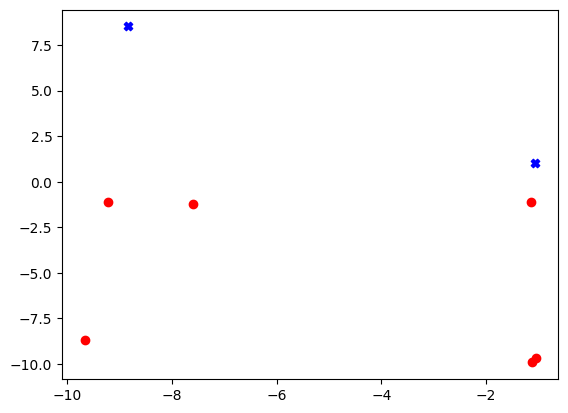

In [16]:
data = X_test_2d[:][:].values

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

zero = np.where(knn_y_pred == 0)
one = np.where(knn_y_pred == 1)

plt.scatter(data[zero, 0], data[zero, 1],
            color='red', marker='o', label='zero')
plt.scatter(data[one, 0], data[one, 1],
            color='blue', marker='X', label='one')

plt.show()

# Plotting dmc decision surface

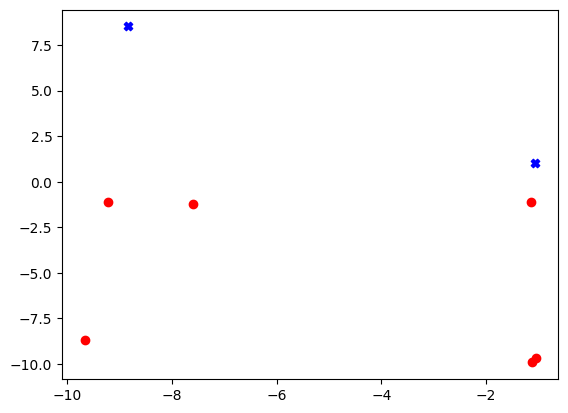

In [17]:
data = X_test_2d[:][:].values

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

zero = np.where(dmc_y_pred == 0)
one = np.where(dmc_y_pred == 1)

plt.scatter(data[zero, 0], data[zero, 1],
            color='red', marker='o', label='zero')
plt.scatter(data[one, 0], data[one, 1],
            color='blue', marker='X', label='one')

plt.show()